In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("../data/user_nutritional_data.csv")
df.head()

,Gender,Age,Daily meals frequency,Physical exercise,Height,Weight,BMR,Carbs,Proteins,Fats,Calories
0,0,29,3,0,165,101.0,1901.25,285.188,114.075,76.050,2281.502
1,1,25,3,4,165,53.0,1275.25,302.872,121.149,80.766,2422.978
2,0,23,2,0,170,70.0,1652.50,247.875,99.150,66.100,1983.000
3,0,22,3,0,168,112.0,2065.00,309.750,123.900,82.600,2478.000
4,0,19,3,2,175,67.0,1673.75,324.289,129.716,86.477,2594.313


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2182 non-null   int64  
 1   Age                    2182 non-null   int64  
 2   Daily meals frequency  2182 non-null   int64  
 3   Physical exercise      2182 non-null   int64  
 4   Height                 2182 non-null   int64  
 5   Weight                 2182 non-null   float64
 6   BMR                    2182 non-null   float64
 7   Carbs                  2182 non-null   float64
 8   Proteins               2182 non-null   float64
 9   Fats                   2182 non-null   float64
 10  Calories               2182 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 187.6 KB


In [4]:
df.describe()

,Gender,Age,Daily meals frequency,Physical exercise,Height,Weight,BMR,Carbs,Proteins,Fats,Calories
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000
mean,0.420257,26.752062,2.869844,0.489459,162.763520,73.814207,1556.891155,250.358567,100.143417,66.762272,2002.868384
std,0.493713,8.425983,0.624663,1.012815,10.123945,20.837370,270.809953,56.031911,22.412771,14.941842,448.255305
min,0.000000,15.000000,2.000000,0.000000,122.000000,35.000000,861.500000,129.225000,51.690000,34.460000,1033.800000
25%,0.000000,22.000000,2.000000,0.000000,157.000000,56.000000,1350.000000,207.412000,82.965000,55.310000,1659.298000
50%,0.000000,24.000000,3.000000,0.000000,163.000000,72.000000,1548.250000,242.925000,97.170000,64.780000,1943.400000
75%,1.000000,28.000000,3.000000,1.000000,170.000000,89.000000,1742.500000,285.748000,114.299250,76.199500,2285.984500
max,1.000000,75.000000,4.000000,4.000000,188.000000,150.000000,2408.750000,461.047000,184.419000,122.946000,3688.378000


In [5]:
df.shape

(2182, 11)

In [6]:
#Checking for missing values:

df.isnull().sum()

Gender                   0
Age                      0
Daily meals frequency    0
Physical exercise        0
Height                   0
Weight                   0
BMR                      0
Carbs                    0
Proteins                 0
Fats                     0
Calories                 0
dtype: int64

No missing values yay

In [7]:
X=df.drop(columns= ['Carbs', 'Proteins', 'Fats', 'Calories', 'Daily meals frequency', 'BMR'])
print(X.head())

y=df['BMR']
print(y.head())

   Gender  Age  Physical exercise  Height  Weight
0       0   29                  0     165   101.0
1       1   25                  4     165    53.0
2       0   23                  0     170    70.0
3       0   22                  0     168   112.0
4       0   19                  2     175    67.0
0    1901.25
1    1275.25
2    1652.50
3    2065.00
4    1673.75
Name: BMR, dtype: float64


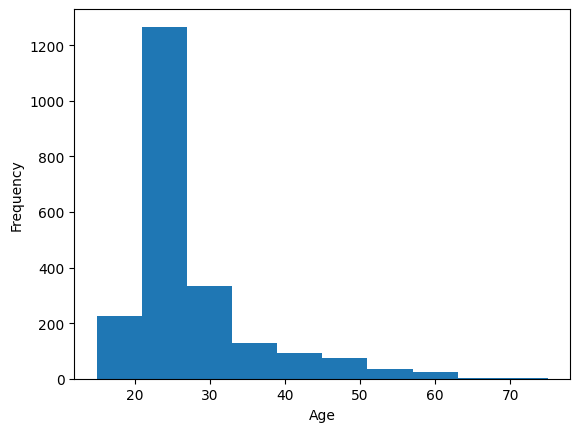

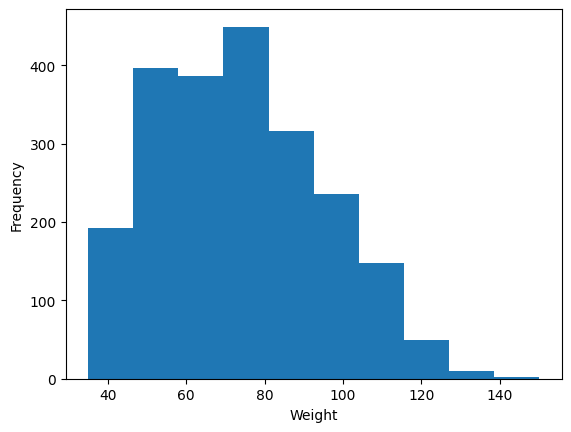

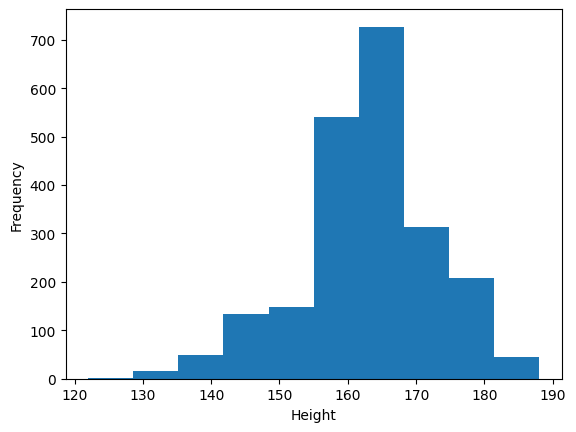

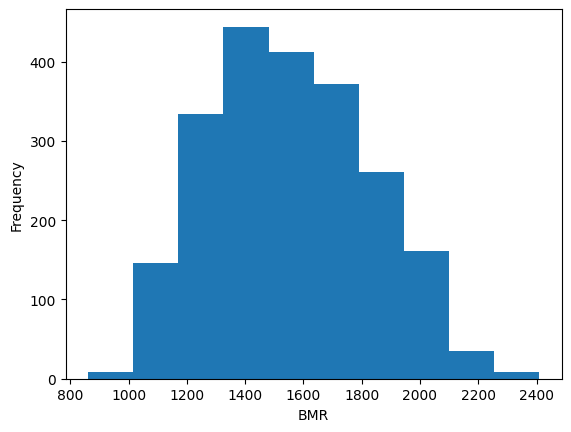

In [8]:
#Class distribution

plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


plt.hist(df['Weight'])
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()


plt.hist(df['Height'])
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

plt.hist(df['BMR'])
plt.xlabel("BMR")
plt.ylabel("Frequency")
plt.show()

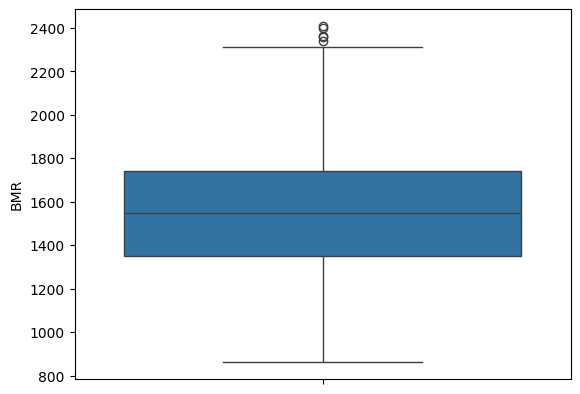

      Gender  Age  Daily meals frequency  Physical exercise  Height  Weight  \
1004       0   26                      4                  1     180   134.0   
1016       0   23                      3                  0     180   135.0   
1322       0   22                      3                  0     180   138.0   
1340       0   22                      4                  0     180   134.0   
1775       0   28                      3                  0     183   140.0   

          BMR    Carbs  Proteins    Fats  Calories  
1004  2340.00  402.188   160.875  107.25  3217.502  
1016  2365.00  354.750   141.900   94.60  2838.000  
1322  2400.00  360.000   144.000   96.00  2880.000  
1340  2360.00  354.000   141.600   94.40  2832.000  
1775  2408.75  361.312   144.525   96.35  2890.498  


In [9]:
# Visual inspection of outliers (Boxplot)

sns.boxplot(df['BMR'])
plt.show()

#IQR

Q1=np.percentile(df['BMR'],25)
Q3=np.percentile(df['BMR'], 75)

IQR= Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=df[(df['BMR']<lower_bound) |(df['BMR']>upper_bound)]
print(outliers)



These are statistical outliers, not data errors. These are actual people with high BMRs. Hence, we retain them. Random forest is robust to outliers anyway.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state= 42)

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np


In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

print("=" * 60)
print("MODEL TRAINING & EVALUATION")
print("=" * 60)

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# TODO 1: Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}

# TODO 2: Train and evaluate each model
for name, model in models.items():
    print(f"\n[{name}]")
    
    # TODO 3: Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    
    # Convert negative MAE to positive
    cv_mae = -cv_scores.mean()
    
    print(f"  Cross-Validation MAE: {cv_mae:.2f} calories")
    
    # TODO 4: Train on full training set
    model.fit(X_train, y_train)
    
    # TODO 5: Predict on test set
    y_pred = model.predict(X_test)
    
    # TODO 6: Calculate test metrics
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'cv_mae': cv_mae,
        'test_mae': test_mae,
        'test_mape': test_mape,
        'test_r2': test_r2
    }
    
    print(f"  Test MAE: {test_mae:.2f} calories")
    print(f"  Test MAPE: {test_mape*100:.2f}%")
    print(f"  Test R² Score: {test_r2:.4f}")

# TODO 7: Find best model
best_model_name = min(results, key=lambda x: results[x]['test_mae'])
print(f"\n🏆 WINNER: {best_model_name}")
print(f"   MAE: {results[best_model_name]['test_mae']:.2f} calories")


MODEL TRAINING & EVALUATION

[Linear Regression]
  Cross-Validation MAE: 0.00 calories
  Test MAE: 0.00 calories
  Test MAPE: 0.00%
  Test R² Score: 1.0000

[Random Forest]
  Cross-Validation MAE: 12.17 calories
  Test MAE: 10.10 calories
  Test MAPE: 0.69%
  Test R² Score: 0.9963

[Gradient Boosting]
  Cross-Validation MAE: 12.19 calories
  Test MAE: 11.08 calories
  Test MAPE: 0.73%
  Test R² Score: 0.9970

🏆 WINNER: Linear Regression
   MAE: 0.00 calories


In [14]:
print("=" * 60)
print("FEATURE INSPECTION")
print("=" * 60)

print("\nFeatures (X) columns:")
print(X.columns.tolist())

print("\nTarget (y) name:")
print(y.name)

print("\nFirst 5 rows of X:")
print(X.head())

print("\nFirst 5 values of y:")
print(y.head())

# Check if BMR is accidentally in X
if 'BMR' in X.columns:
    print("\n🚨 ERROR: BMR is in your features! This is DATA LEAKAGE!")
else:
    print("\n✓ BMR is NOT in features (correct)")

# Check for perfect correlation
print("\nCorrelation of features with BMR:")
correlation = X.corrwith(y).abs().sort_values(ascending=False)
print(correlation)

# If any feature has correlation > 0.99, it's suspicious
if (correlation > 0.99).any():
    print("\n🚨 WARNING: Some features have >0.99 correlation with BMR!")
    print(correlation[correlation > 0.99])


FEATURE INSPECTION

Features (X) columns:
['Gender', 'Age', 'Physical exercise', 'Height', 'Weight']

Target (y) name:
BMR

First 5 rows of X:
   Gender  Age  Physical exercise  Height  Weight
0       0   29                  0     165   101.0
1       1   25                  4     165    53.0
2       0   23                  0     170    70.0
3       0   22                  0     168   112.0
4       0   19                  2     175    67.0

First 5 values of y:
0    1901.25
1    1275.25
2    1652.50
3    2065.00
4    1673.75
Name: BMR, dtype: float64

✓ BMR is NOT in features (correct)

Correlation of features with BMR:
Weight               0.848706
Gender               0.645170
Height               0.531185
Age                  0.177442
Physical exercise    0.025903
dtype: float64
